## Dimension Reduction using PCA, ISOMAP, LLE, TSNE with 갯벌데이터

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
data = pd.read_csv('./coast_data.csv', encoding='cp949')

In [83]:
data

,id,수온,염분,용존무기질,암모니아성,아질산성질,수소이온농,부유물질,규산염,화학적산소,...,IL,AVS,TOC,출현 종수,서식밀도,생체량,다양도,ISEP,target,cluster
0,316,26.545851,32.309583,66.104868,14.319576,6.972082,8.971575,11.728246,304.869238,1.931958,...,3.902331,0.012846,0.575771,13,1073,150.599923,1.716036,4.175251,0,3
1,317,26.554848,32.349542,64.474188,14.589719,6.735795,9.020834,11.714478,305.679106,1.920418,...,3.869125,0.012892,0.569858,13,1101,147.291657,1.708048,4.208229,0,3
2,401,23.993582,31.361310,27.374896,12.254332,2.251062,8.153433,7.006110,156.534014,1.819130,...,2.946323,0.006347,0.383279,13,1043,314.840727,1.745837,4.040576,0,4
3,402,24.128544,31.392720,40.357462,18.472264,3.081622,8.146589,7.890393,197.425405,1.868407,...,3.134258,0.007535,0.411179,13,1047,341.836530,1.777640,3.969894,0,4
4,403,24.307723,31.448773,57.618235,26.818344,4.176601,8.137937,9.054508,253.578305,1.938230,...,3.242570,0.008644,0.427284,14,1073,371.648822,1.815197,3.888848,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,24081,25.851886,33.253367,159.641510,74.357581,8.735472,8.070027,37.725838,373.821118,1.447972,...,4.148814,0.017251,0.586218,12,1911,354.587269,1.607382,4.237762,0,3
1395,24255,25.894292,33.064516,138.494067,62.239657,7.511863,8.118775,28.153697,342.306087,1.406727,...,4.115956,0.016743,0.580026,12,1820,345.025454,1.611839,4.212133,0,3
1396,24260,25.857437,33.283780,151.143962,69.175223,8.155382,8.087579,34.285327,360.565348,1.346410,...,4.146499,0.017121,0.585546,12,1886,351.880468,1.608239,4.230977,0,3
1397,24434,25.877573,33.207776,124.338925,54.974428,6.756500,8.123419,25.826087,316.492313,1.396592,...,4.113549,0.016644,0.579423,12,1800,342.911197,1.612521,4.207032,0,4


In [84]:
data.columns

Index(['id', '수온', '염분', '용존무기질', '암모니아성', '아질산성질', '수소이온농', '부유물질 ', '규산염',
       '화학적산소', '투명도', '질소', '질산성질소', '인산염인', '클로로필', '용존산소', '총인', '자갈', '모래',
       '실트', '점토', '평균', '분급', 'IL', 'AVS', 'TOC', '출현 종수', '서식밀도', '생체량',
       '다양도', 'ISEP', 'target', 'cluster'],
      dtype='object')

In [85]:
X = data.drop(['id', 'target', 'cluster'], axis=1)
y = data.loc[:,'cluster']

- 군집은 해당 공모전을 진행하면서 클러스터링을 통해 나온 값

In [86]:
X

,수온,염분,용존무기질,암모니아성,아질산성질,수소이온농,부유물질,규산염,화학적산소,투명도,...,평균,분급,IL,AVS,TOC,출현 종수,서식밀도,생체량,다양도,ISEP
0,26.545851,32.309583,66.104868,14.319576,6.972082,8.971575,11.728246,304.869238,1.931958,2.790455,...,5.896350,2.240928,3.902331,0.012846,0.575771,13,1073,150.599923,1.716036,4.175251
1,26.554848,32.349542,64.474188,14.589719,6.735795,9.020834,11.714478,305.679106,1.920418,2.876130,...,5.810385,2.225997,3.869125,0.012892,0.569858,13,1101,147.291657,1.708048,4.208229
2,23.993582,31.361310,27.374896,12.254332,2.251062,8.153433,7.006110,156.534014,1.819130,2.505587,...,4.175186,1.632856,2.946323,0.006347,0.383279,13,1043,314.840727,1.745837,4.040576
3,24.128544,31.392720,40.357462,18.472264,3.081622,8.146589,7.890393,197.425405,1.868407,2.515155,...,4.292488,1.756812,3.134258,0.007535,0.411179,13,1047,341.836530,1.777640,3.969894
4,24.307723,31.448773,57.618235,26.818344,4.176601,8.137937,9.054508,253.578305,1.938230,2.544460,...,4.344209,1.827487,3.242570,0.008644,0.427284,14,1073,371.648822,1.815197,3.888848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,25.851886,33.253367,159.641510,74.357581,8.735472,8.070027,37.725838,373.821118,1.447972,3.460256,...,5.238635,2.278679,4.148814,0.017251,0.586218,12,1911,354.587269,1.607382,4.237762
1395,25.894292,33.064516,138.494067,62.239657,7.511863,8.118775,28.153697,342.306087,1.406727,4.589568,...,5.244803,2.252678,4.115956,0.016743,0.580026,12,1820,345.025454,1.611839,4.212133
1396,25.857437,33.283780,151.143962,69.175223,8.155382,8.087579,34.285327,360.565348,1.346410,3.986115,...,5.245909,2.274175,4.146499,0.017121,0.585546,12,1886,351.880468,1.608239,4.230977
1397,25.877573,33.207776,124.338925,54.974428,6.756500,8.123419,25.826087,316.492313,1.396592,4.815051,...,5.249796,2.249135,4.113549,0.016644,0.579423,12,1800,342.911197,1.612521,4.207032


- 변수 별로 단위가 다르기때문에 표준화 작업을 거침 (필수X)

In [87]:
from sklearn.preprocessing import StandardScaler

In [88]:
scaler = StandardScaler()

In [89]:
X_scale = scaler.fit_transform(X)

In [90]:
X_scale = pd.DataFrame(X_scale, columns = X.columns)

In [179]:
X_scale

,수온,염분,용존무기질,암모니아성,아질산성질,수소이온농,부유물질,규산염,화학적산소,투명도,...,평균,분급,IL,AVS,TOC,출현 종수,서식밀도,생체량,다양도,ISEP
0,0.043802,0.750176,-0.364546,-0.614037,-0.118623,0.289176,-0.462882,-0.422457,-0.079577,0.001734,...,0.319759,0.002319,-0.217129,-0.190829,-0.069290,0.409561,-0.333788,-0.754739,0.366268,0.042088
1,0.055752,0.775434,-0.376444,-0.609418,-0.142888,0.320733,-0.464089,-0.419429,-0.104401,0.059099,...,0.254856,-0.023780,-0.239912,-0.187695,-0.095519,0.409561,-0.308819,-0.769996,0.323300,0.106123
2,-3.346364,0.150766,-0.647131,-0.649347,-0.603432,-0.234973,-0.876857,-0.976991,-0.322275,-0.189005,...,-0.979715,-1.060569,-0.873086,-0.630426,-0.923055,0.409561,-0.360540,0.002694,0.526575,-0.219418
3,-3.167096,0.170620,-0.552407,-0.543038,-0.518141,-0.239357,-0.799335,-0.824123,-0.216278,-0.182599,...,-0.891152,-0.843898,-0.744136,-0.550070,-0.799312,0.409561,-0.356973,0.127192,0.697649,-0.356665
4,-2.929092,0.206052,-0.426467,-0.400345,-0.405695,-0.244901,-0.697280,-0.614202,-0.066086,-0.162978,...,-0.852103,-0.720360,-0.669818,-0.475077,-0.727882,0.858602,-0.333788,0.264678,0.899674,-0.514034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,-0.877988,1.346748,0.317924,0.412435,0.062462,-0.288407,1.816249,-0.164688,-1.120653,0.450212,...,-0.176814,0.068308,-0.048006,0.107191,-0.022957,-0.039480,0.413493,0.185995,-0.218211,0.163467
1395,-0.821660,1.227374,0.163626,0.205254,-0.063192,-0.257176,0.977088,-0.282503,-1.209373,1.206366,...,-0.172157,0.022859,-0.070551,0.072828,-0.050421,-0.039480,0.332344,0.141898,-0.194234,0.113703
1396,-0.870615,1.365972,0.255924,0.323832,0.002892,-0.277162,1.514630,-0.214243,-1.339115,0.802312,...,-0.171321,0.060434,-0.049594,0.098358,-0.025936,-0.039480,0.391199,0.173512,-0.213599,0.150294
1397,-0.843869,1.317930,0.060346,0.081041,-0.140762,-0.254201,0.773034,-0.379005,-1.231174,1.357342,...,-0.168387,0.016666,-0.072203,0.066131,-0.053094,-0.039480,0.314509,0.132148,-0.190566,0.103798


- 시각화를 위해 3개 변수만 사용해서 나타냄
- 선형으로 보기는 힘듦
- 군집별로 차이가 보이기는 함

Text(0.5, 0.92, 'Original data')

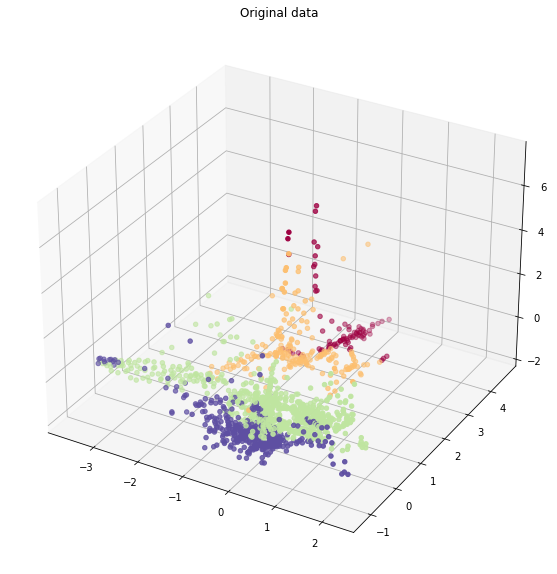

In [189]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_scale.loc[:, '수온'], X_scale.loc[:, '질소'], X_scale.loc[:, '클로로필'], c = y, cmap=plt.cm.Spectral)
ax.set_title("Original data")

In [41]:
from sklearn.manifold import Isomap, LocallyLinearEmbedding, TSNE
from sklearn.decomposition import PCA

In [184]:
pca = PCA(n_components=2, random_state=0)
isomap = Isomap(n_neighbors=80, n_components=2)
lle = LocallyLinearEmbedding(n_neighbors=80, n_components=2, random_state=0)
tsne = TSNE(perplexity=80, n_components=2, learning_rate=50, random_state=0)

In [185]:
print("Computing PCA embedding")
X_pca = pca.fit_transform(X_scale)
print("Computing ISOMAP embedding")
X_isomap = isomap.fit_transform(X_scale)
print("Computing LLE embedding")
X_lle = lle.fit_transform(X_scale)
print("Computing TSNE embedding")
X_tsne = tsne.fit_transform(X_scale)

Computing PCA embedding
Computing ISOMAP embedding
Computing LLE embedding
Computing TSNE embedding


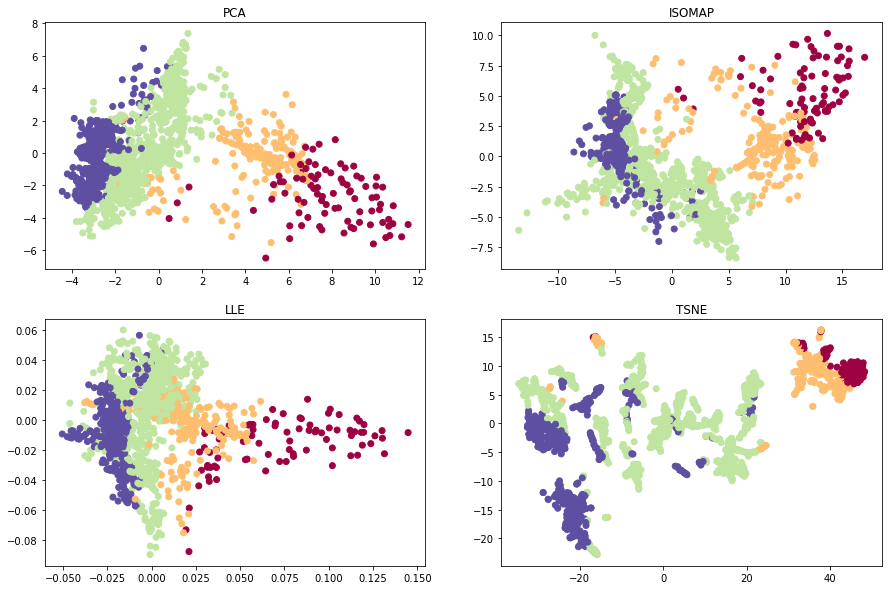

In [186]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(221)
ax.scatter(X_pca[:, 0], X_pca[:, 1], c = y, cmap=plt.cm.Spectral)
plt.axis("tight")
#plt.xticks([]), plt.yticks([])
plt.title("PCA")

ax = fig.add_subplot(222)
ax.scatter(X_isomap[:, 0], X_isomap[:, 1], c = y, cmap=plt.cm.Spectral)
plt.axis("tight")
#plt.xticks([]), plt.yticks([])
plt.title("ISOMAP")

ax = fig.add_subplot(223)
ax.scatter(X_lle[:, 0], X_lle[:, 1], c = y, cmap=plt.cm.Spectral)
plt.axis("tight")
#plt.xticks([]), plt.yticks([])
plt.title("LLE")

ax = fig.add_subplot(224)
ax.scatter(X_tsne[:, 0], X_tsne[:, 1], c = y, cmap=plt.cm.Spectral)
plt.axis("tight")
#plt.xticks([]), plt.yticks([])
plt.title("TSNE")

plt.show()

- PCA와 MDS를 활용한 ISOMAP은 PCA와 유사함
- LLE는 PCA와 다르게 분산을 최대화하도록 차원축소를 하는 기법이 아니기에 축이 더 작음을 알 수 있음
- 확실히 TSNE를 통한 비선형 차원축소가 유사한 객체들을 더 잘 묶어줌